In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a synthetic 100x100 pixel texture
texture_size = 100
texture = np.zeros((texture_size, texture_size, 3), dtype=np.uint8)

# Fill the texture with a simple pattern for visualization
for i in range(texture_size):
    for j in range(texture_size):
        # Create a gradient from red to blue across rows and green down columns
        texture[i, j, 0] = int(255 * (j / texture_size))  # Red component (horizontal gradient)
        texture[i, j, 1] = int(255 * (i / texture_size))  # Green component (vertical gradient)
        texture[i, j, 2] = int(255 * (1 - j / texture_size)) # Blue component (horizontal inverse gradient)


# 2. Define a texture point (U,V) in normalized coordinates
U = 0.7 # Horizontal coordinate (0.0 to 1.0)
V = 0.9 # Vertical coordinate (0.0 to 1.0)

print(f"Defined UV coordinates: (U={U}, V={V})")

Defined UV coordinates: (U=0.7, V=0.9)


### Cálculo de Coordenadas de Píxel y Obtención del Color

Ahora, convertiremos las coordenadas UV normalizadas a coordenadas de píxel dentro de nuestra textura y obtendremos el color en ese punto.

Calculated pixel coordinates: (Row=89, Column=69)
Color at (U=0.7, V=0.9) / Pixel (89, 69): RGB=[175 226  79]


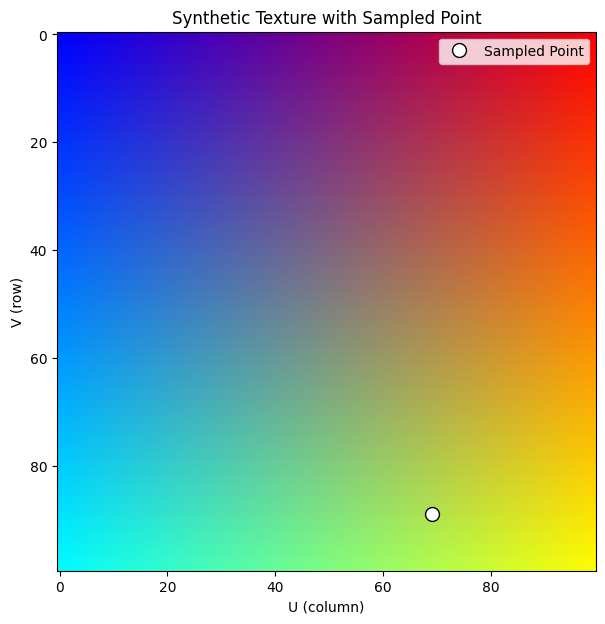

In [4]:
# 3. Calculate the corresponding pixel coordinates
# Pixel coordinates are typically integers, so we'll round.
# U corresponds to the column (width), V corresponds to the row (height).
# Note: Image indexing is usually (row, col) or (height, width).
# Here, V maps to row_idx and U maps to col_idx.

pixel_col = int(U * (texture_size - 1)) # -1 to ensure it stays within bounds [0, texture_size-1]
pixel_row = int(V * (texture_size - 1)) # -1 to ensure it stays within bounds [0, texture_size-1]

print(f"Calculated pixel coordinates: (Row={pixel_row}, Column={pixel_col})")

# 4. Get the color from the texture at that point
color_at_point = texture[pixel_row, pixel_col]

print(f"Color at (U={U}, V={V}) / Pixel ({pixel_row}, {pixel_col}): RGB={color_at_point}")

# Visualize the texture and the sampled point
plt.figure(figsize=(7, 7))
plt.imshow(texture)
plt.title('Synthetic Texture with Sampled Point')
plt.xlabel('U (column)')
plt.ylabel('V (row)')

# Mark the sampled point on the texture (adjusting for matplotlib's origin usually at top-left)
plt.plot(pixel_col, pixel_row, 'o', color='white', markersize=10, markeredgecolor='black', label='Sampled Point')
plt.legend()
plt.grid(False)
plt.show()

Scanline from X=2 to X=8 on Row=5
Color at X=2: [  0   0 255] (Blue)
Color at X=8: [255   0   0] (Red)
Interpolation factor for X=2: 0.0
Interpolated color for X=2: [  0   0 255]
------------------------------
Interpolation factor for X=3: 0.16666666666666666
Interpolated color for X=3: [ 42   0 212]
------------------------------
Interpolation factor for X=4: 0.3333333333333333
Interpolated color for X=4: [ 85   0 170]
------------------------------
Interpolation factor for X=5: 0.5
Interpolated color for X=5: [127   0 127]
------------------------------
Interpolation factor for X=6: 0.6666666666666666
Interpolated color for X=6: [170   0  85]
------------------------------
Interpolation factor for X=7: 0.8333333333333334
Interpolated color for X=7: [212   0  42]
------------------------------
Interpolation factor for X=8: 1.0
Interpolated color for X=8: [255   0   0]
------------------------------


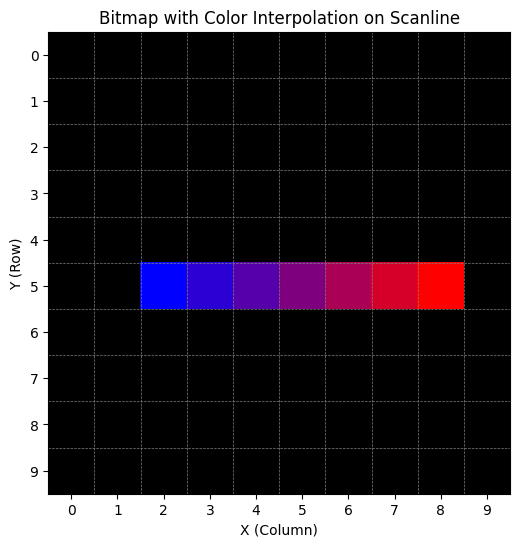

Bitmap with interpolated scanline displayed.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a 10x10 pixel bitmap (RGB format)
bitmap_size = 10
# Initialize with black pixels (0,0,0) or white (255,255,255) to see the gradient clearly
bitmap = np.zeros((bitmap_size, bitmap_size, 3), dtype=np.uint8)

# Define scanline parameters
scanline_row = 5 # Let's pick a middle row for visualization
scanline_start_x = 2 # Column index for the start of the scanline
scanline_end_x = 8 # Column index for the end of the scanline

# Define the colors in RGB format
color1 = np.array([0, 0, 255], dtype=np.uint8) # Pure Blue (R:0, G:0, B:255)
color2 = np.array([255, 0, 0], dtype=np.uint8) # Pure Red (R:255, G:0, B:0)

print(f"Scanline from X={scanline_start_x} to X={scanline_end_x} on Row={scanline_row}")
print(f"Color at X={scanline_start_x}: {color1} (Blue)")
print(f"Color at X={scanline_end_x}: {color2} (Red)")

# Calculate the range of columns for interpolation
num_pixels_in_scanline = scanline_end_x - scanline_start_x





# 2. Apply linear interpolation along the scanline
for x in range(scanline_start_x, scanline_end_x + 1):
    # Calculate interpolation factor 't'
    # t = 0 at scanline_start_x, t = 1 at scanline_end_x
    t = (x - scanline_start_x) / num_pixels_in_scanline

    print(f"Interpolation factor for X={x}: {t}")
    # Interpolate each color component
    interpolated_color = (color1 * (1 - t) + color2 * t).astype(np.uint8)
    print(f"Interpolated color for X={x}: {interpolated_color}")
    print("-" * 30)

    # Assign the interpolated color to the bitmap at the scanline row
    bitmap[scanline_row, x] = interpolated_color





# 3. Display the bitmap
plt.figure(figsize=(6, 6))
ax = plt.gca() # Get current axes

plt.imshow(bitmap, interpolation='nearest') # 'nearest' to show distinct pixels
plt.title('Bitmap with Color Interpolation on Scanline')
plt.xlabel('X (Column)')
plt.ylabel('Y (Row)')

# Set major ticks for labels (centered on pixels)
ax.set_xticks(np.arange(bitmap_size))
ax.set_yticks(np.arange(bitmap_size))
ax.set_xticklabels(np.arange(bitmap_size))
ax.set_yticklabels(np.arange(bitmap_size))

# Set minor ticks for grid lines (between pixels)
ax.set_xticks(np.arange(bitmap_size + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(bitmap_size + 1) - 0.5, minor=True)

# Grid lines using minor ticks
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(which='minor', size=0) # Hide minor tick marks

plt.show()

print("Bitmap with interpolated scanline displayed.")